## Sentiment Analyzer

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


The data set I have chosen is the book reviews data set. I will be predicting whether the review is a positive review or a negative review. This is a supervised binary classification problem because each example has a label that is only either true or false. In this particular data set, there's only one feature, which is the review itself. This is an important problem because publishers could easily classify large amounts of reviews to see whether a book is having a positive/negative reception without manually reading through them.

In [4]:
# YOUR CODE HERE
sum = df.isnull().sum()
print(sum)

print("----")

class_distribution = df['Positive Review'].value_counts()
print(class_distribution)

Review             0
Positive Review    0
dtype: int64
----
False    993
True     980
Name: Positive Review, dtype: int64


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Since there was only one feature, my feature list remains the same. I checked for any null values and also verified that the class imbalance was not too great. First, I will create labeled examples and create training and test data sets. Next, I will use several natural language processing technique, such as TF-IDF vectorization. My model is a neural network, which will be constructed of an input layer, output layer, and several hidden layers. I will experiment with various hidden layers to see which one presents the best accuracy.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [5]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

2024-08-02 09:04:48.550924: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-02 09:04:48.550952: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

18558
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                1187776   
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 1,190,401
Trainable params: 1,190,401
Non-trainable params: 0
_________________________________________________________________
Epoch [5/ 55], Loss: 0.6893, Accuracy: 0.5410, Val_loss: 0.6865, Val_accuracy: 0.5135
Epoch [10/ 55], Lo

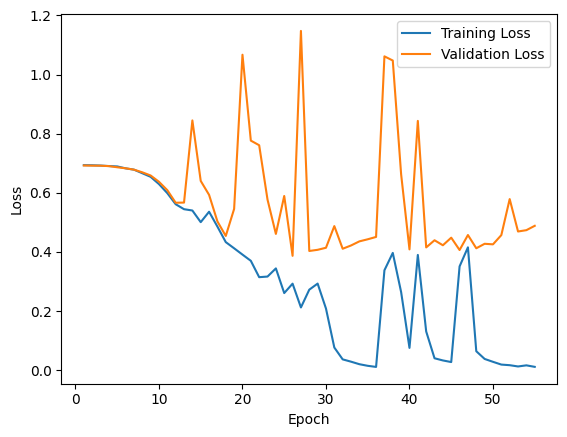

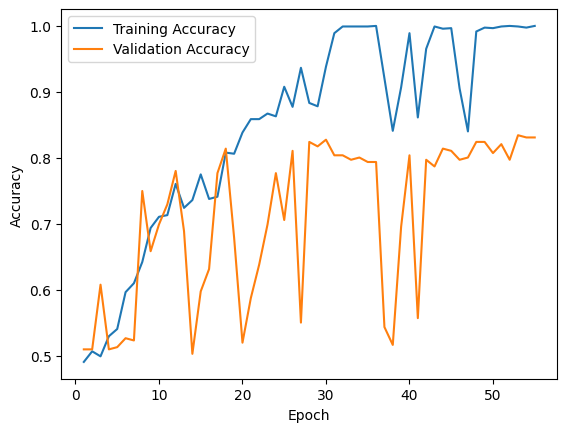

16/16 [==============================] - 0s 1ms/step - loss: 0.5313 - accuracy: 0.8158
Loss:  0.5312696695327759 Accuracy:  0.8157894611358643
Review #1:

I picked up the first Volumne of these Graphic novel series a while ago and I've been trying to get the whole series ever since! The concept is new and interesrting and the art is always great.

Animal Farm was especially good because of all the twists in the plot line. Nothing is as it seems to be! Take my word.


Prediction: Is this a good review? True

Actual: Is this a good review? False



In [11]:
# YOUR CODE HERE

#create labeled examples
X = df['Review']
y = df['Positive Review']

#create training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

#vectorize the documents (the reviews)
tf_vect = TfidfVectorizer()

tf_vect.fit(X_train)

X_train_tf = tf_vect.transform(X_train)
X_test_tf = tf_vect.transform(X_test)

vocabulary_size = len(tf_vect.vocabulary_)
print(vocabulary_size)

#constructing the neural network
nn_model = keras.Sequential()

#input layer
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,))
nn_model.add(input_layer)

#hidden layer 1
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.33))

#hidden layer 2
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu')
nn_model.add(hidden_layer_2)

#hidden layer 3
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu')
nn_model.add(hidden_layer_3)
#output layer
output_layer = keras.layers.Dense(units=1, activation='sigmoid')
nn_model.add(output_layer)

nn_model.summary()

#optimization function
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

#loss function
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

#compile
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

#fit the model to the data
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
        
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v) for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

num_epochs = 55

history = nn_model.fit(
    X_train_tf.toarray(),
    y_train,
    epochs=num_epochs,
    verbose=0, # disable the default progress bar
    validation_split=0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
)

# Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#evaluation
loss, accuracy = nn_model.evaluate(X_test_tf.toarray(), y_test)
print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

probability_predictions = nn_model.predict(X_test_tf.toarray())


print('Review #1:\n')
print(X_test.to_numpy()[40])
goodReview = True if probability_predictions[40] >= .5 else False
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))
print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[11]))